<a href="https://colab.research.google.com/github/Ming-sean-Tsai/tibaml1017/blob/main/%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os
from keras import utils


# 載入訓練資料

flist1 = os.listdir("/content/文字辨識/訓練資料/x_train") # 讀檔名
x_train = np.empty([len(flist1),50,50])
y_train = np.empty(len(flist1))
x_dict = {"血":0, "行":1, "衣":2, "西":3}
a = 0
# 建立y_train.txt(因為os.listdir為亂序，所以要建立)
with open('/content/文字辨識/訓練資料/y_train.txt', 'w') as f:
  for i in flist1:

    f.write(i[0])
    f.write("\n")

    x_train[a] = cv2.imread(f"/content/文字辨識/訓練資料/x_train/{i}", 0)
    ret, x_train[a] = cv2.threshold(x_train[a], 127, 255, cv2.THRESH_BINARY_INV) # 黑白互換
    y_train[a] = x_dict[i[0]]
    a = a + 1
# 載入測試資料

flist2 = os.listdir("/content/文字辨識/測試資料/x_test") # 讀檔名
x_test = np.empty([len(flist2),50,50])
y_test = np.empty(len(flist2))

a = 0
with open('/content/文字辨識/測試資料/y_test.txt', 'w') as f:
  for i in flist2:

    f.write(i[0])
    f.write("\n")

    x_test[a] = cv2.imread(f"/content/文字辨識/測試資料/x_test/{i}", 0)
    ret, x_test[a] = cv2.threshold(x_test[a], 127, 255, cv2.THRESH_BINARY_INV) 
    y_test[a] = x_dict[i[0]]
    a = a + 1

# 訓練集資料
x_train = x_train.reshape(x_train.shape[0],-1)  # 轉換資料形狀
x_train = x_train.astype('float32')/255      # 轉換資料型別
y_train = y_train.astype(np.float32)

# 測試集資料
x_test = x_test.reshape(x_test.shape[0],-1)    # 轉換資料形狀
x_test = x_test.astype('float32')/255       # 轉換資料型別
y_test = y_test.astype(np.float32)

knn=cv2.ml.KNearest_create()       # 建立 KNN 訓練方法
knn.setDefaultK(16)            # 參數設定
knn.setIsClassifier(True)

print('training...')
knn.train(x_train, cv2.ml.ROW_SAMPLE, y_train)  # 開始訓練
knn.save('tch_knn.xml')       # 儲存訓練模型
print('ok')

print('testing...')
test_pre = knn.predict(x_test)    # 讀取測試集並進行辨識
test_ret = test_pre[1]
test_ret = test_ret.reshape(-1,)
test_sum = (test_ret == y_test)
acc = test_sum.mean()        # 得到準確率
print(acc)

training...
ok
testing...
[0. 3. 0. 3. 2. 3. 3. 1. 1. 2. 2. 0. 3. 2. 0. 3. 1. 1. 0. 2.]
0.95


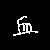

error: ignored

In [57]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


m = cv2.ml.KNearest_load('tch_knn.xml')   # 載入模型
m1 = cv2.imread("/content/文字辨識/測試資料/x_test/血_45.png", 0)
ret, m1 = cv2.threshold(m1, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(m1)
cv2_imshom1 = m1.astype(np.float32)    # 轉換格式
m1 = m1.reshape(-1,)          # 打散成一維陣列資料，轉換成辨識使用的格式
m1 = m1.reshape(1,-1)
m1 = m1/255
img_pre = m.predict(m1)          # 進行辨識

